In [1]:
import vaex
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from glob import glob
from os.path import join, abspath
from os import pardir, curdir, mkdir
import healpy as hp

In [2]:
# healpix config
LEVEL = 1
NSIDE = 2**LEVEL
NPIX = hp.nside2npix(NSIDE)
NPIX

48

In [3]:
root_data_dir = abspath(join(pardir, "Data"))
twomass_dir = join(root_data_dir, "TWOMASS-15.8")
gaia_dir = join(root_data_dir, "Gaia-2MASS")

In [4]:
name = "Completeness"
data_dir = join(root_data_dir, name)
try:
  mkdir(data_dir)
  print(f"Creating {name} dir in Data dir")
except FileExistsError:
  print("Directory already exist. Good to go!")

Directory already exist. Good to go!


In [5]:
twomass_files = glob(join(twomass_dir, "*.hdf5"))
twomass_files[:5]

['/home2/s20321005/Thesis-Project/Data/TWOMASS/tmass-070-080.hdf5',
 '/home2/s20321005/Thesis-Project/Data/TWOMASS/tmass-060-070.hdf5',
 '/home2/s20321005/Thesis-Project/Data/TWOMASS/tmass-010-020.hdf5',
 '/home2/s20321005/Thesis-Project/Data/TWOMASS/tmass-320-330.hdf5',
 '/home2/s20321005/Thesis-Project/Data/TWOMASS/tmass-200-210.hdf5']

In [6]:
gaia_files = glob(join(gaia_dir, "*.hdf5"))
gaia_files[:5]

['/home2/s20321005/Thesis-Project/Data/Gaia-2MASS/gaia-219-220.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Gaia-2MASS/gaia-079-080.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Gaia-2MASS/gaia-218-219.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Gaia-2MASS/gaia-182-183.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Gaia-2MASS/gaia-045-046.hdf5']

In [7]:
tmass = vaex.open_many(twomass_files)
tmass["J-K"] = tmass["Jmag"] - tmass["Kmag"]
tmass

#,ra,dec,Jmag,Hmag,Kmag,J-K
0,70.000147,-73.327232,10.583,9.985,9.717,0.8660002
1,70.000158,-73.298195,12.086,11.151,10.797,1.2890005
2,70.000188,-79.923325,13.487,13.145,13.07,0.41700077
3,70.000465,-89.049103,12.022,11.554,11.451,0.5710001
4,70.000511,-76.362122,11.954,11.548,11.413,0.54100037
...,...,...,...,...,...,...
"37,995,329",109.959101,71.371353,12.514,12.192,12.19,0.32400036
"37,995,330",109.96032,71.409782,11.604,11.099,11.043,0.5609999
"37,995,331",109.967031,70.026169,12.273,11.984,11.952,0.3210001
"37,995,332",109.973617,77.130386,13.272,12.965,12.945,0.32700062


In [8]:
# add healpix index
phi = tmass["ra"].to_numpy()*np.pi/180
theta = (90-tmass["dec"].to_numpy())*np.pi/180
index = hp.ang2pix(NSIDE, theta, phi)
index

array([44, 44, 44, ...,  1,  1,  1])

In [9]:
tmass["index"] = index
tmass

#,ra,dec,Jmag,Hmag,Kmag,J-K,index
0,70.000147,-73.327232,10.583,9.985,9.717,0.8660002,44
1,70.000158,-73.298195,12.086,11.151,10.797,1.2890005,44
2,70.000188,-79.923325,13.487,13.145,13.07,0.41700077,44
3,70.000465,-89.049103,12.022,11.554,11.451,0.5710001,44
4,70.000511,-76.362122,11.954,11.548,11.413,0.54100037,44
...,...,...,...,...,...,...,...
"37,995,329",109.959101,71.371353,12.514,12.192,12.19,0.32400036,1
"37,995,330",109.96032,71.409782,11.604,11.099,11.043,0.5609999,1
"37,995,331",109.967031,70.026169,12.273,11.984,11.952,0.3210001,1
"37,995,332",109.973617,77.130386,13.272,12.965,12.945,0.32700062,1


In [11]:
gaia_raw = vaex.open_many(gaia_files)
# gaia_raw = gaia_raw.filter(gaia_raw['Jmag'] < 13.5)
gaia_raw

#,source_id,ra,dec,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,Gmag,BPmag,RPmag,rv_gaia,e_rv_gaia,bp_rp,GLON,GLAT,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,RAVE6,SDSS13,Jmag,Hmag,Kmag,mh_gspspec,mh_gspspec_lower,mh_gspspec_upper,alphafe_gspspec,alphafe_gspspec_lower,alphafe_gspspec_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs
0,5764635079544432128,219.77805455719,-89.56922832436,7.511,1.522,0.021,-7.355,0.020949371,2.8775,0.0184,10.847249,11.118501,10.412085,-5.29,0.73,0.706416,303.15029042357,-26.74401558194,6141.6,6130.1,6152.1,4.043,4.0398,4.0469,-0.4365,-0.4457,-0.4269,344.0585,341.9788,346.0511,0.0799,0.0745,0.0847,,--,9.953,9.698,9.683,-0.26,-0.32,-0.22,0.33,0.26,0.4,nan,nan,nan,F
1,5764635393079767296,219.15195997564,-89.5318109641,11.203,-8.352,0.012,-7.467,0.012214055,0.4305,0.011,13.174702,13.789571,12.425439,67.09,0.91,1.364132,303.16401990137,-26.70832039314,4718.7,4713.3,4724.8,2.5833,2.5655,2.6014,-0.1946,-0.1952,-0.1941,2070.6995,2031.6134,2112.0928,0.3619,0.3574,0.3668,,--,11.418,10.819,10.704,nan,nan,nan,nan,nan,nan,nan,nan,nan,K
2,5764635496158988544,219.83101507284,-89.50979783241,2.65,-2.095,0.022,1.623,0.024982337,0.2155,0.0218,14.993793,15.584641,14.263248,nan,nan,1.321393,303.18075914642,-26.69113646047,4881.6,4875.7,4888.8,3.0708,3.0509,3.0862,-0.1415,-0.15,-0.1356,3446.1995,3376.546,3517.8865,0.4145,0.4093,0.4207,,--,13.306,12.725,12.634,nan,nan,nan,nan,nan,nan,nan,nan,nan,K
3,5764638554175708672,219.24632619569,-89.48870252979,11.672,-10.811,0.017,-4.399,0.01951931,1.9675,0.0166,14.446186,14.915824,13.815229,13.17,3.9,1.100595,303.18615009602,-26.66999019517,5226.6,5217.9,5235.5,4.5456,4.5418,4.5518,-0.1967,-0.2063,-0.1864,490.8246,487.5747,493.967,0.2623,0.2565,0.2679,,--,13.026,12.587,12.512,nan,nan,nan,nan,nan,nan,nan,nan,nan,K
4,5764639241370488064,219.24010479539,-89.44765029195,14.783,-10.759,0.113,-10.139,0.12553297,1.2643,0.1066,17.817894,18.871086,16.80843,nan,nan,2.062656,303.2064053892,-26.63317348591,4119.2,4089.7,4135.9,4.6477,4.6411,4.6547,0.3467,0.2681,0.3855,822.1085,799.1945,831.1044,0.7264,0.6964,0.7513,,--,15.434,14.768,14.468,nan,nan,nan,nan,nan,nan,nan,nan,nan,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"94,994,937",576406227696244864,33.65804765403,89.33197663578,4.686,-4.139,0.072,-2.197,0.064973824,0.6416,0.0561,16.92992,17.625141,16.097548,nan,nan,1.527594,123.19695964994,26.50349463792,4337.4,4217.8,4422.2,4.3911,4.2846,4.4237,-0.3812,-0.4888,-0.3243,1117.2708,1065.5874,1205.549,0.305,0.1938,0.3925,,--,14.993,14.263,14.201,nan,nan,nan,nan,nan,nan,nan,nan,nan,K
"94,994,938",576431585183142528,33.61268607589,89.48206639541,1.894,-1.763,0.02,0.693,0.017867079,0.6989,0.0159,14.399571,15.067607,13.604876,-14.88,3.59,1.462731,123.13723815775,26.64377331058,5178.8,5133.0,5367.7,3.5746,3.4492,3.8413,-0.4349,-0.4827,-0.291,1165.2085,893.3535,1341.377,0.9013,0.8756,0.9909,,--,12.616,12.051,11.924,nan,nan,nan,nan,nan,nan,nan,nan,nan,K
"94,994,939",576445638316125184,33.60957894134,89.57301292445,4.728,-2.691,0.018,3.887,0.015934618,0.7782,0.015,14.292352,14.78063,13.633098,-36.36,7.38,1.147533,123.10127650839,26.72887005884,5855.7,5835.1,5878.4,4.0048,3.9971,4.0145,-0.583,-0.6066,-0.555,1217.041,1196.2493,1234.8632,0.7542,0.7434,0.7665,,--,12.857,12.457,12.404,nan,nan,nan,nan,nan,nan,nan,nan,nan,G
"94,994,940",576447459382243200,33.57768719537,89.70251709954,17.162,10.764,0.021,13.367,0.021056626,0.9942,0.0197,14.856944,15.333351,14.206361,-6.87,13.13,1.12699,123.04990412536,26.85002805556,5420.3,5395.1,5501.3,4.2236,4.2103,4.2407,-1.28,-1.323,-1.1485,946.7403,929.4686,962.1341,0.4847,0.4702,0.5

In [12]:
gaia = gaia_raw[["Jmag", "Kmag", "ra", "dec"]]
gaia["J-K"] = gaia["Jmag"]-gaia["Kmag"]
gaia = gaia.extract() 
gaia

#,Jmag,Kmag,ra,dec,J-K
0,9.953,9.683,219.77805455719,-89.56922832436,0.27000046
1,11.418,10.704,219.15195997564,-89.5318109641,0.71399975
2,13.306,12.634,219.83101507284,-89.50979783241,0.67199993
3,13.026,12.512,219.24632619569,-89.48870252979,0.51399994
4,15.434,14.468,219.24010479539,-89.44765029195,0.9659996
...,...,...,...,...,...
"94,994,937",14.993,14.201,33.65804765403,89.33197663578,0.7919998
"94,994,938",12.616,11.924,33.61268607589,89.48206639541,0.6920004
"94,994,939",12.857,12.404,33.60957894134,89.57301292445,0.45300007
"94,994,940",13.478,12.953,33.57768719537,89.70251709954,0.5249996


In [ ]:
# add healpix index
phi = gaia["ra"].to_numpy()*np.pi/180
theta = (90-gaia["dec"].to_numpy())*np.pi/180
index = hp.ang2pix(NSIDE, theta, phi)
index

array([46, 46, 46, ...,  0,  0,  0])

In [ ]:
gaia["index"] = index
gaia

#,Jmag,Kmag,ra,dec,J-K,index
0,9.953,9.683,219.77805455719,-89.56922832436,0.27000046,46
1,11.418,10.704,219.15195997564,-89.5318109641,0.71399975,46
2,13.306,12.634,219.83101507284,-89.50979783241,0.67199993,46
3,13.026,12.512,219.24632619569,-89.48870252979,0.51399994,46
4,11.663,11.294,219.15896993321,-89.41391295861,0.36900043,46
...,...,...,...,...,...,...
"27,575,371",10.773,10.285,33.73276052092,89.14773406101,0.48799992,0
"27,575,372",11.324,10.496,33.27627882199,89.20703044058,0.82800007,0
"27,575,373",12.616,11.924,33.61268607589,89.48206639541,0.6920004,0
"27,575,374",12.857,12.404,33.60957894134,89.57301292445,0.45300007,0


In [1]:
# compare
tmass.viz.histogram("Jmag", c='k')
gaia.viz.histogram("Jmag", c='r')
plt.axvline(15.8)

NameError: name 'tmass' is not defined

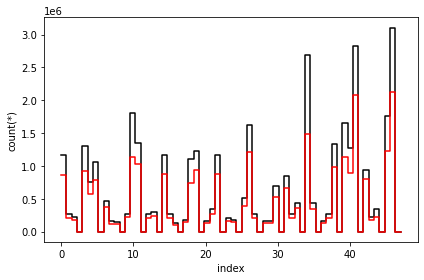

In [14]:
tmass.viz.histogram("index", c='k')
gaia.viz.histogram("index", c='r')

In [15]:
number_gaia, edge_gaia = np.histogram(gaia.index.to_numpy(), range=[-0.5, NPIX-0.5], bins=NPIX)
number_twomass, edge_twomass = np.histogram(tmass.index.to_numpy(), range=[-0.5, NPIX-0.5], bins=NPIX)
xcenter= (edge_gaia[:-1]+edge_gaia[1:])/2

In [16]:
overall_completeness = number_gaia/number_twomass
overall_completeness = np.nan_to_num(overall_completeness)
more_than_one = overall_completeness > 1
overall_completeness[more_than_one] = 1

(0.0, 1.0)

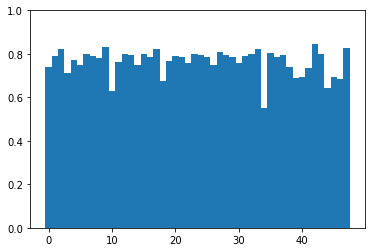

In [17]:
plt.bar(xcenter, overall_completeness, width=1)
plt.ylim(0,1)

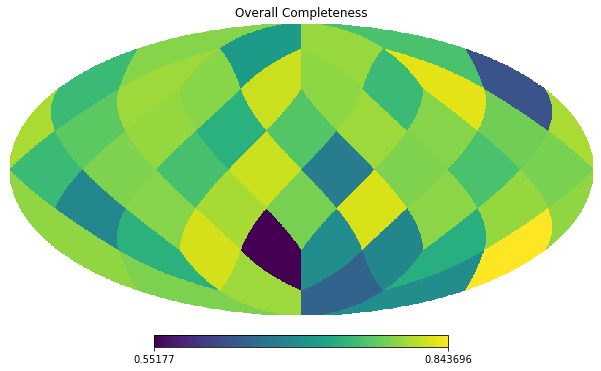

In [18]:
hp.mollview(overall_completeness,nest=True, title="Overall Completeness")

In [19]:
# partition in J and J-K
eJ = np.linspace(4, 13.5, 51)
eJK = np.linspace(-0.5, 1.5, 31)
J = (eJ[:-1]+eJ[1:])/2
JK = (eJK[:-1]+eJK[1:])/2

In [24]:
comp_tot = []
for i in range(NPIX):
  gaia_filtered = gaia[gaia["index"] == i]
  tmass_filtered = tmass[tmass["index"] == i]
  gaiaH, _, _ = np.histogram2d(gaia_filtered["J-K"].to_numpy(), gaia_filtered["Jmag"].to_numpy(), bins=(eJK, eJ))
  gaiaH = gaiaH.T
  tmassH, _, _ = np.histogram2d(tmass_filtered["J-K"].to_numpy(), tmass_filtered["Jmag"].to_numpy(), bins=(eJK, eJ))
  tmassH = tmassH.T
  comp = np.nan_to_num(gaiaH/tmassH)
  more_than_one = comp > 1
  comp[more_than_one] = 1
  for j, (jk, jk_low, jk_high) in enumerate(zip(JK, eJK[:-1], eJK[1:])):
    comp_df = vaex.from_arrays(comp=comp[:, j], index=(np.ones_like(J)*i).astype(int), 
                               jk=np.ones_like(J)*jk, j=J, jk_low=np.ones_like(J)*jk_low, 
                               jk_high=np.ones_like(J)*jk_high, j_low=eJ[:-1], j_high=eJ[1:])
    if len(comp_tot) == 0:
      comp_tot = comp_df
    else:
      comp_tot = comp_tot.concat(comp_df)
  print(i, len(comp_tot))

<ipython-input-24-bd453d56f4b7>:9: RuntimeWarning: invalid value encountered in true_divide
  comp = np.nan_to_num(gaiaH/tmassH)


0 1500
1 3000
2 4500
3 6000
4 7500
5 9000


<ipython-input-24-bd453d56f4b7>:9: RuntimeWarning: divide by zero encountered in true_divide
  comp = np.nan_to_num(gaiaH/tmassH)


6 10500
7 12000
8 13500
9 15000
10 16500
11 18000
12 19500
13 21000
14 22500
15 24000
16 25500
17 27000
18 28500
19 30000
20 31500
21 33000
22 34500
23 36000
24 37500
25 39000
26 40500
27 42000
28 43500
29 45000
30 46500
31 48000
32 49500
33 51000
34 52500
35 54000
36 55500
37 57000
38 58500
39 60000
40 61500
41 63000
42 64500
43 66000
44 67500
45 69000
46 70500
47 72000


In [25]:
comp_tot

#,comp,index,jk,j,jk_low,jk_high,j_low,j_high
0,0.0,0,-0.4666666666666667,4.095000000000001,-0.5,-0.43333333333333335,4.0,4.19
1,0.0,0,-0.4666666666666667,4.285,-0.5,-0.43333333333333335,4.19,4.38
2,0.0,0,-0.4666666666666667,4.475,-0.5,-0.43333333333333335,4.38,4.57
3,0.0,0,-0.4666666666666667,4.665,-0.5,-0.43333333333333335,4.57,4.76
4,0.0,0,-0.4666666666666667,4.855,-0.5,-0.43333333333333335,4.76,4.95
...,...,...,...,...,...,...,...,...
"71,995",0.0,47,1.4666666666666668,12.645,1.4333333333333333,1.5,12.55,12.74
"71,996",0.0,47,1.4666666666666668,12.835,1.4333333333333333,1.5,12.74,12.93
"71,997",0.0,47,1.4666666666666668,13.025,1.4333333333333333,1.5,12.93,13.120000000000001
"71,998",0.0,47,1.4666666666666668,13.215,1.4333333333333333,1.5,13.120000000000001,13.31


In [26]:
comp_tot.export(join(data_dir, "comp.hdf5"), progress=True)

export(hdf5) [########################################] 100.00% elapsed time  :     3.11s =  0.1m =  0.0h
 